# Kaggle - Predict CO2 Emissions in Rwanda

### Playground Series - Season 3, Episode 20

---
## Dataset Description
The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

 - Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
 - Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
 - Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
 - Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
 - UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
 - Ozone - COPERNICUS/S5P/NRTI/L3_O3
 - Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD
 
Important: Please only use the data provided for this challenge as part of your modeling effort. Do not use any external data, including any data from Sentinel-5P not provided on this page.

Files
train.csv - the training set
test.csv - the test set; your task is to predict the emission target for each week at each location
sample_submission.csv - a sample submission file in the correct format


## Explorative Data Analysis (EDA)

In [1]:
import pandas as pd

#Load train data and visualise the first few rows
df = pd.read_csv("train.csv")

df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
#Get info of on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [5]:
#Check means for exogenous data for weather data should be standardised
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


The target variable is contained in the final column "emissions", the longitude, latitude, year and week act as identifiers, while the other data is exogenous data. The means across the exogenous data columns indicate that they have various rangous. Therefore, it would be a good idea to standardise the data before training to keep the unit of measurement from affecting the model performance.

In [1]:
#Let's load the clean training dataset
import data_handling

df = data_handling.load_data()

#Check the number of locations contained in the dataset
len(df["coordinates"].unique())

497

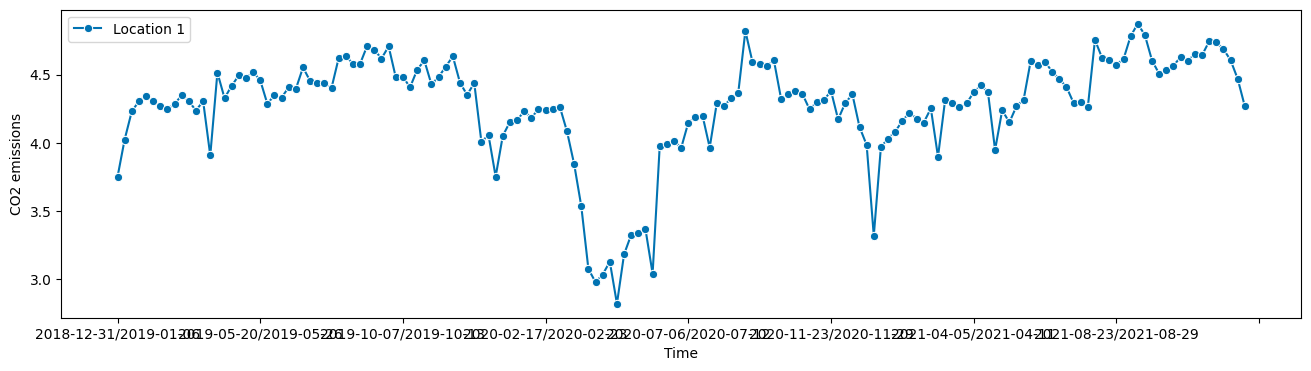

In [2]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_loc1 = df[df["coordinates"]==(-0.51, 29.29)]

plot_series( df_loc1["emission"], labels=["Location 1"], x_label="Time", y_label = "CO2 emissions")
plt.show()

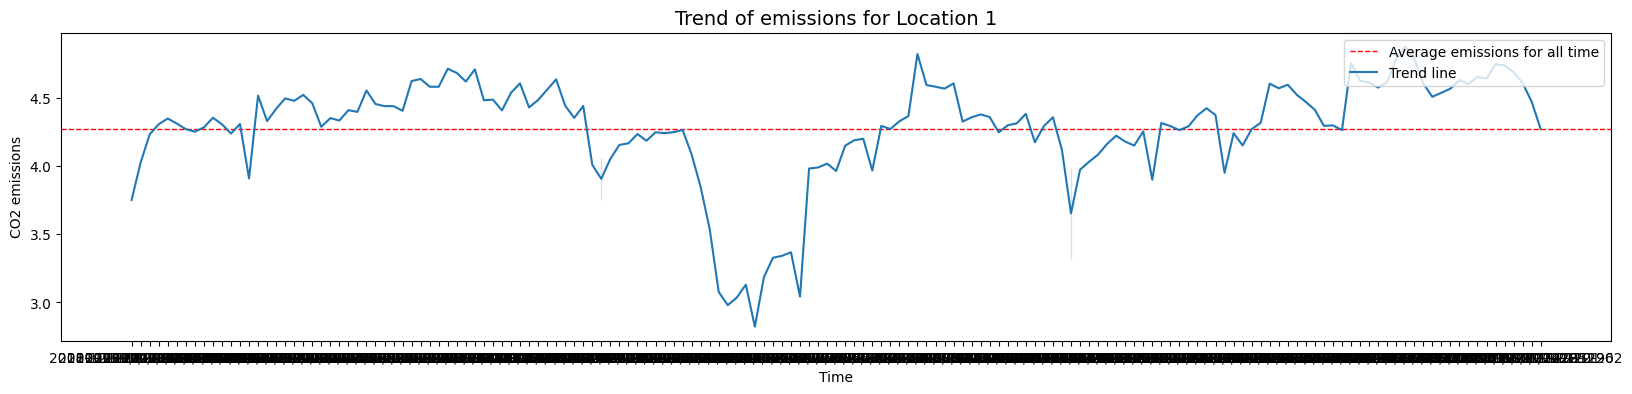

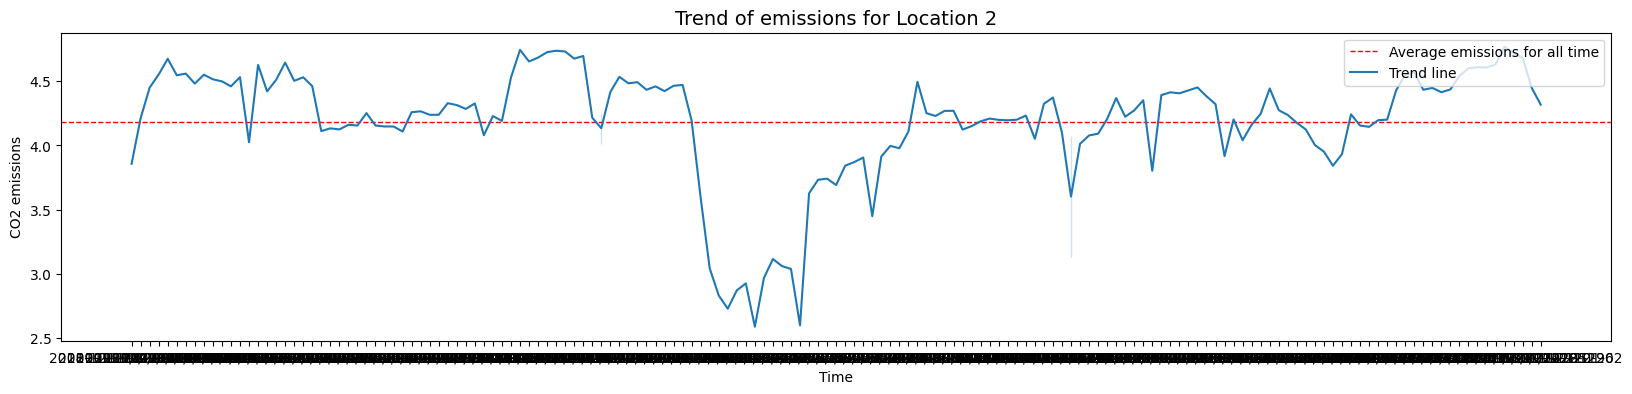

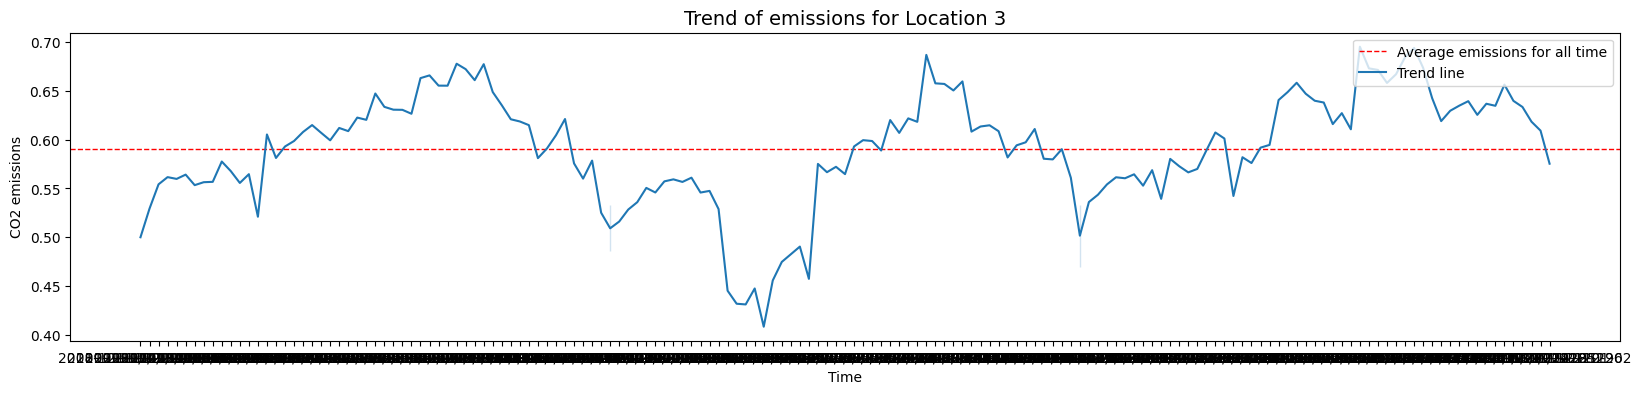

In [3]:
import seaborn as sns

#Labels should be the coordinates of the first three locations in the dataframe
locations = df["coordinates"].unique()[0:3]

loc_counter = 1

for loc in locations:
        df_loc = df[df["coordinates"] == loc]
        index = df_loc.index
        plt.figure(figsize=(20,4))
        plt.axhline (y =df_loc['emission'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average emissions for all time')
        sns.lineplot(data=df_loc, x=df_loc.index.astype(str), y='emission', label = 'Trend line')
        plt.title(f'Trend of emissions for Location {loc_counter}', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Time')
        plt.ylabel('CO2 emissions')
        plt.show()
        print('\n')

        loc_counter += 1

The emission trends appear to be different for each of the three locations, which indicates we should separate forecasts for each location in the data. Additionally, we can see the same dip in emissions during 2020 due to COVID. It is worth exploring if this is skewing the trend line and should be removed.

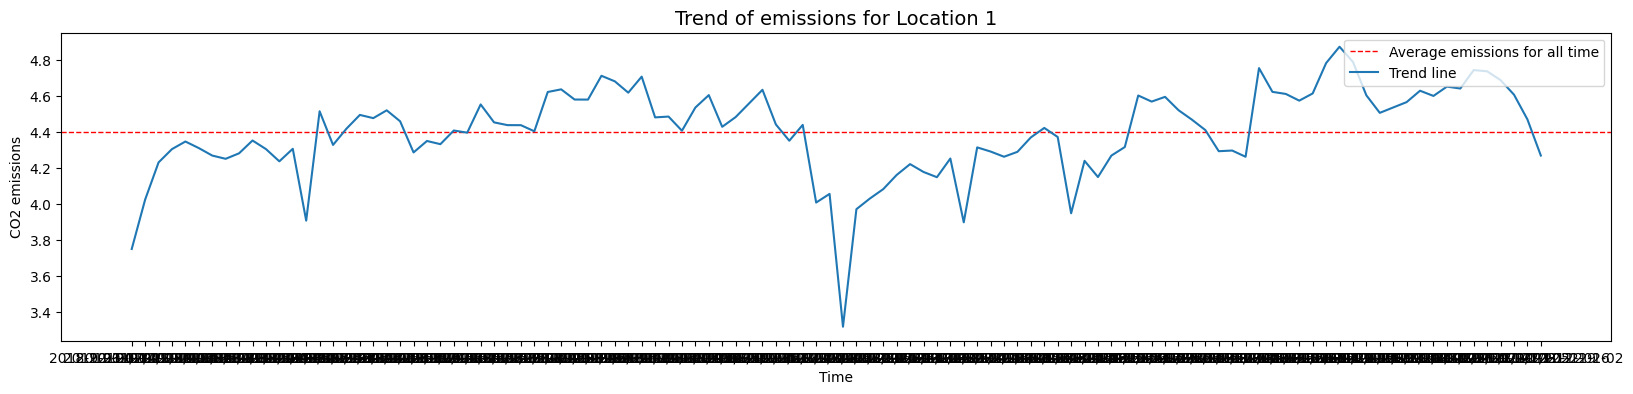

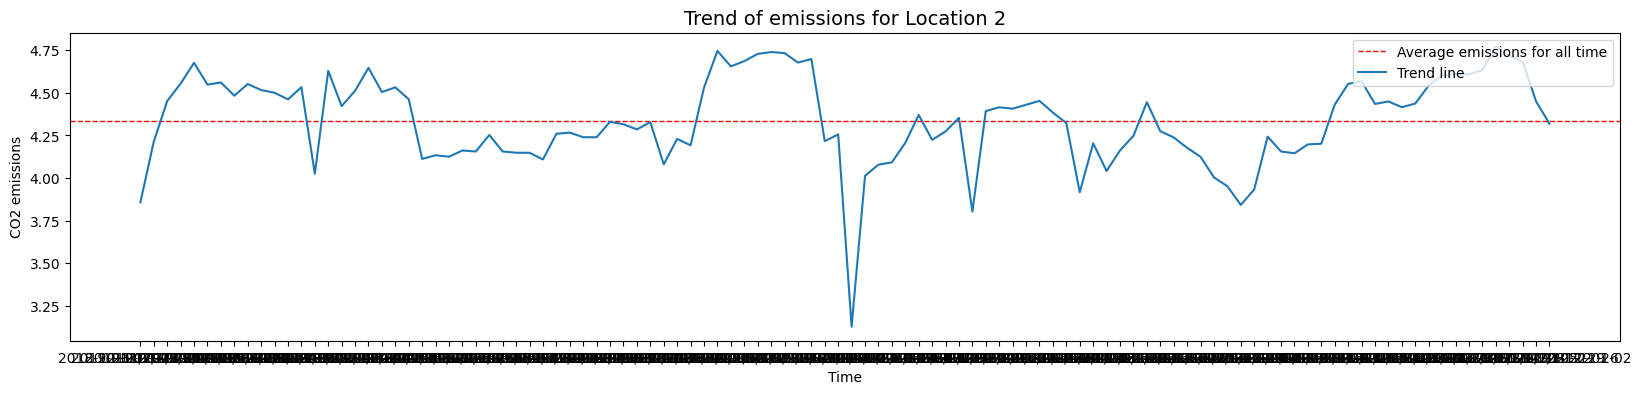

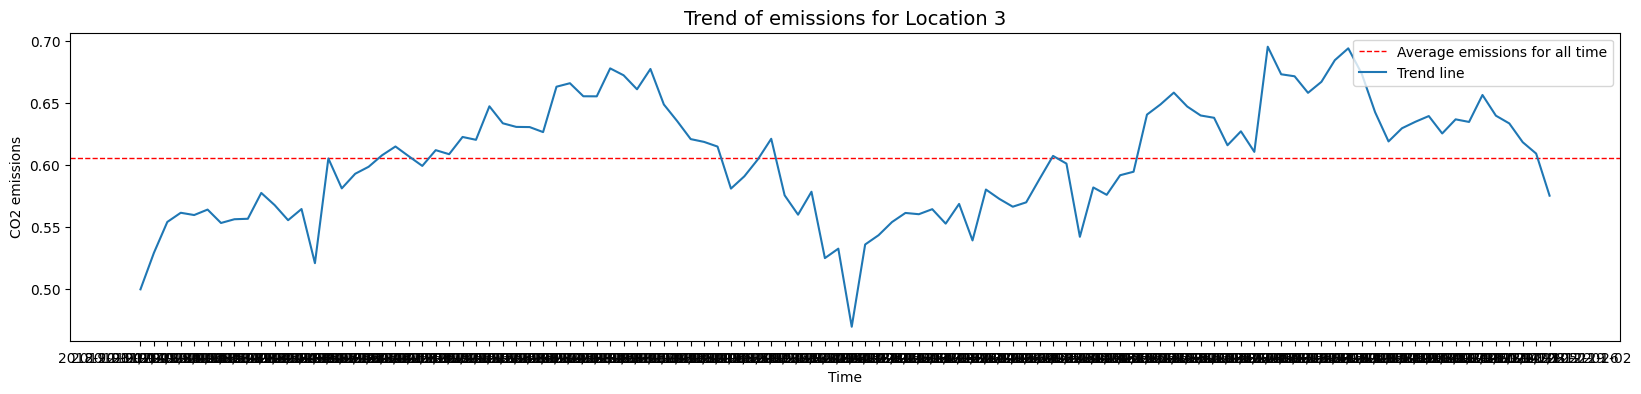

In [4]:
df_v2 = data_handling.load_data_drop_2020()

#Labels should be the coordinates of the first three locations in the dataframe with 2020 removed
locations = df_v2["coordinates"].unique()[0:3]

loc_counter = 1

for loc in locations:
        df_loc = df_v2[df_v2["coordinates"] == loc]
        index = df_loc.index
        plt.figure(figsize=(20,4))
        plt.axhline (y =df_loc['emission'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Average emissions for all time')
        sns.lineplot(data=df_loc, x=df_loc.index.astype(str), y='emission', label = 'Trend line')
        plt.title(f'Trend of emissions for Location {loc_counter}', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Time')
        plt.ylabel('CO2 emissions')
        plt.show()
        print('\n')

        loc_counter += 1

Removing 2020 from the data does shift the trendline for each investigated location up a bit. However, it does mean losing a third of the dataset. Therefore, we will keep 2020 as part of the data in favour of having a larger dataset to work off.

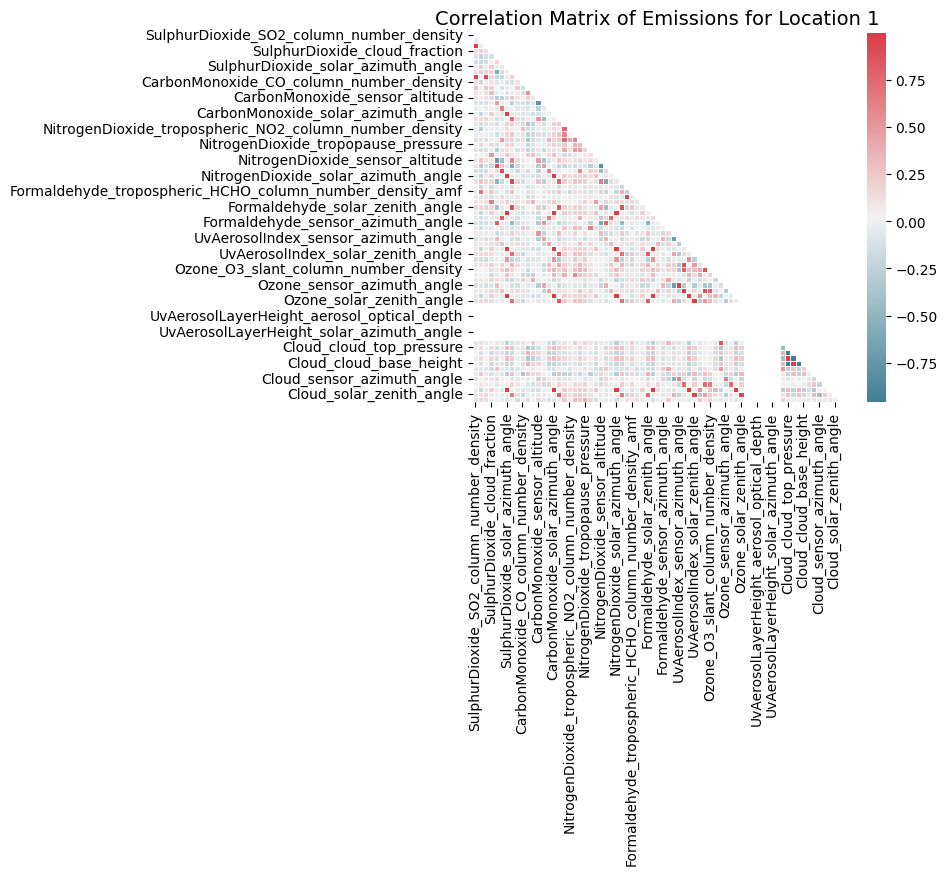

,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
SulphurDioxide_SO2_column_number_density,1.000000,-0.024470,0.979172,0.146025,-0.102463,-0.140203,-0.025229,0.131218,0.922141,0.109944,...,0.022830,-0.019444,0.021448,-0.078476,0.083088,-0.072518,0.024142,-0.027117,0.125040,-0.110323
SulphurDioxide_SO2_column_number_density_amf,-0.024470,1.000000,0.052045,0.226319,-0.233294,-0.179398,-0.197549,0.222453,0.071917,-0.160113,...,-0.112378,0.155294,-0.115943,-0.066857,0.212443,0.030963,0.095529,-0.198902,0.117507,0.180914
SulphurDioxide_SO2_slant_column_number_density,0.979172,0.052045,1.000000,0.163964,-0.146677,-0.160537,-0.032799,0.188254,0.941952,0.056338,...,0.006520,0.001641,0.003714,-0.076733,0.086815,-0.058230,0.056187,-0.035071,0.159718,-0.107928
SulphurDioxide_cloud_fraction,0.146025,0.226319,0.163964,1.000000,-0.119413,0.038124,0.219287,0.183609,0.146091,0.103894,...,-0.151686,0.143161,-0.162799,-0.154504,-0.104022,0.084482,0.000557,0.194964,0.055922,0.009679
SulphurDioxide_sensor_azimuth_angle,-0.102463,-0.233294,-0.146677,-0.119413,1.000000,0.159282,-0.028812,-0.577026,-0.201917,-0.072963,...,0.141532,-0.123313,0.135249,0.259248,-0.041049,0.156452,-0.068742,-0.028788,-0.019204,0.001172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,-0.072518,0.030963,-0.058230,0.084482,0.156452,0.038564,0.022105,-0.091748,-0.070915,-0.008429,...,0.027163,-0.046180,0.011371,-0.091081,-0.173973,1.000000,-0.227649,0.022952,-0.405857,-0.028624
Cloud_sensor_zenith_angle,0.024142,0.095529,0.056187,0.000557,-0.068742,0.027836,0.042282,0.173110,0.084130,0.006597,...,0.061352,0.009301,0.068798,0.163388,0.251277,-0.227649,1.000000,0.039239,0.226861,0.080917
Cloud_solar_azimuth_angle,-0.027117,-0.198902,-0.035071,0.194964,-0.028788,0.101516,0.989908,0.051368,-0.039130,-0.093414,...,-0.248856,0.337599,-0.249205,-0.141176,-0.302003,0.022952,0.039239,1.000000,0.066629,-0.060392
Cloud_solar_zenith_angle,0.125040,0.117507,0.159718,0.055922,-0.019204,-0.033361,0.069800,0.662802,0.158214,-0.163958,...,-0.185496,0.266611,-0.179249,0.065589,0.328692,-0.405857,0.226861,0.066629,1.000000,0.013598


In [20]:
#Now we investigate the correlation between variables by creating a correlation matrix
import numpy as np
import matplotlib.pyplot as plt

df_loc = df[df["coordinates"]== df["coordinates"].unique()[0]]

#Create dataframe containing the relevant features
df_cor = df_loc.drop(columns=["year","week_no", "coordinates", "ID_LAT_LON_YEAR_WEEK"], axis= 1)
df_cor.reset_index(drop= True, inplace=True)

#Compute the correlation matrix
corr = df_cor.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set everything up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap
sns.heatmap(corr, mask= mask, square= True, linewidths= 0.5, annot= False, cmap=cmap)

plt.yticks(rotation=0)
plt.title(f'Correlation Matrix of Emissions for Location 1', fontsize=14)
plt.show()

corr


## NOTES

- Standardise data before training
- check how many locations
- Possibly separate forecasters for each location?
- There are NaN present in the dataset
